# __Keras 프레임워크 활용 모델링 리마인드__
1. __자주 쓰게 될 서브 패키지 및 객체들__
2. __3가지 모델 작성 법__
3. __학습&테스트 과정 및 설정__

# __1. 자주 쓰게 될 서브 패키지 및 객체들__

- keras
- keras.layers
- keras.backend
- keras.losses
- keras.metrics
- keras.optimizers
- keras.callbacks
- keras.utils

In [ ]:
import keras 
print("현재 keras 버전:",keras.__version__)

현재 keras 버전: 2.4.3


In [ ]:
# 주로 쓰는 것들 목록

from keras import Input,Sequential,Model

from keras.layers import Dense,Flatten,Dropout,Conv2D,AvgPool2D,GlobalAveragePooling2D,concatenate,MaxPool2D,Add

import keras.backend as K

from keras.losses import mean_squared_error,CategoricalCrossentropy

from keras.metrics import Accuracy,CategoricalAccuracy,RootMeanSquaredError,AUC

from keras.optimizers import SGD,Adam,RMSprop

from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,LearningRateScheduler,EarlyStopping

import keras.utils as U

# __2. 3가지 모델 작성 법__

- Sequential API
- Functional API
- Subclassing API  
[참고](https://wikidocs.net/106897)  

## __1. Sequential API: 간단한 모델 작성에 편리. 순차적 설계가 가능한 모델에 적용 가능__

In [ ]:
# 리스트 형태로 한 번에 작성하거나
model1=Sequential(
    [
     Dense(10,activation="relu",name="hidden1",input_shape=(28,)),
     Dense(40,activation="relu",name="hidden2"),
     Dense(15,activation="relu",name="hidden3")
    ]
)
print(model1.summary())
print()

# Sequential 객체의 .add 메소드로 전달 가능
model2=Sequential()
model2.add(Input(shape=(8,)))
model2.add(Dense(10,activation="relu",name="hidden1"))
model2.add(Dense(30,activation="relu",name="hidden2"))
model2.add(Dense(10,activation="relu",name="hidden3"))
print(model2.summary())
print()

# Sequential 객체는 파이썬의 리스트처럼 동작하는 특징이 있다.

# 2-index layer 접근하기
print("2-index layer:",model2.layers[2])
print()

# pop 명령도 가능
model2.pop()
print(model2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 10)                290       
_________________________________________________________________
hidden2 (Dense)              (None, 40)                440       
_________________________________________________________________
hidden3 (Dense)              (None, 15)                615       
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________
None

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 10)                90        
_________________________________________________________________
hidden2 (Dense)              (None, 30)                330       
__________________________

### __`Practice1. 다음의 아키텍쳐 스펙을 보고 Sequential 방식으로 설계해보자`__  

![practice1](https://user-images.githubusercontent.com/57827670/115880090-4c248700-a485-11eb-976a-4e75ebf4c04b.png)

In [ ]:
# Answer1.


## __2. Functial API: 다양한 아키텍쳐의 모델을 설계하기 편리. Keras 활용 모델링에서 가장 많이 보편적.__

In [ ]:
# 간단한 CNN 모델을 Functional API 방식으로 작성해보기
# In -> Conv1 -> Conv2 -> FC -> Out

In = Input(shape=(28,28,3))
x = Conv2D(filters=32,kernel_size=3,strides=1,padding="same",activation="relu")(In)
x = MaxPool2D(2,2,padding="valid")(x)
x = Conv2D(filters=64,kernel_size=5,strides=1,padding="same",activation="relu")(x)
x = MaxPool2D(2,2,padding="valid")(x)
x = Flatten()(x)
out = Dense(10,activation="softmax")(x)

model1 = Model(inputs=In,outputs=out)
print(model1.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370 

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 7, 7, 3)]    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 7, 7, 16)     448         input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 25)]         0                                            
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 3, 3, 16)     0           conv2d_2[0][0]                   
____________________________________________________________________________________________

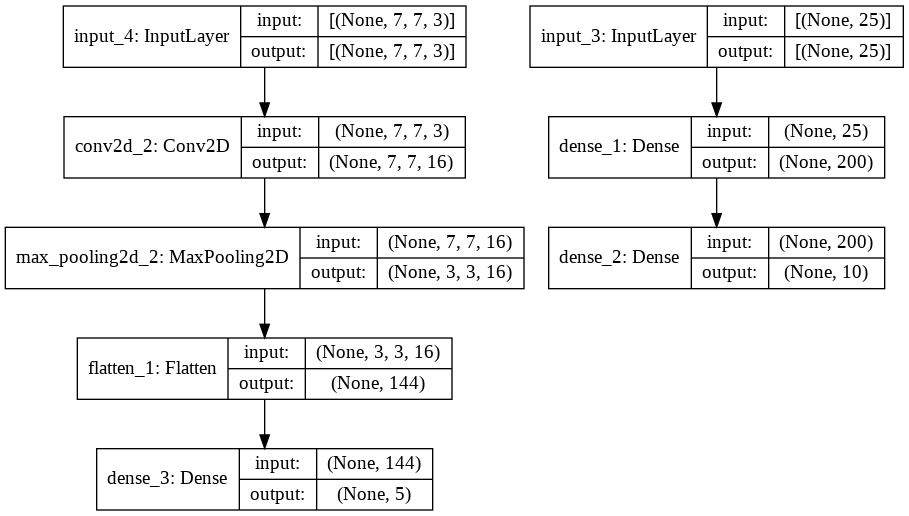

In [ ]:
# 다중-입력, 다중-출력 의 모델 또한 설계가 가능하다.

In1=Input(shape=(25,))
x=Dense(200,activation="relu")(In1)
Out1=Dense(10,activation="softmax")(x)

In2 = Input(shape=(7,7,3))
x = Conv2D(filters=16,kernel_size=3,strides=1,padding="same",activation="relu")(In2)
x = MaxPool2D(2,2,padding="valid")(x)
x = Flatten()(x)
Out2 = Dense(5,activation="softmax")(x)

model = Model(inputs=[In1,In2],outputs=[Out1,Out2])
print(model.summary())
U.plot_model(model, "sample.png", show_shapes=True)

### __`Practice2. 다음의 아키텍쳐 스펙을 보고 Functional API 방식으로 residual-layer를 구현해보자.`__  

![Residual-layer](https://user-images.githubusercontent.com/57827670/115884655-1b931c00-a48a-11eb-9190-dd41a356fbd0.png)  
---
L1 : shape=(48,48,3)  
L2 : filter=3,kernel_size=3,activation=relu,padding=same  
L3 : kernel_size=2,strides=2  
L4 : kernel_size=2,strides=2  
L5 : example. new = Add()([out1,out2,..])  
L6 : example. new = GlobalAveragePooling2D()(old)  
L7 : 10-class softmax classifier  
  
\*참고: 설계한 모델 아키텍쳐 plotting  
```python
U.plot_model(model, "filename.png", show_shapes=True)
```

In [ ]:
# Answer2.

## __3. Subclassing API: 객체지향 프로그래밍 방식을 통해 모델링 과정을 모듈화로 진행하는 방식. keras에서보다 pytorch에서 보편적.__

In [ ]:
# 간단하게 참고 정도만

class my_DNN(Model):
  def __init__(self,out_shape):  # 설계에 필요한 layer 들을 클래스 속성으로 정의
    super(my_DNN, self).__init__()
    self.fc1 = Dense(400,activation="relu")
    self.fc2 = Dense(20,activation="relu")
    self.output_layer = Dense(out_shape,activation="linear")

  def call(self, x): # forward 시 진행되는 연산을 직접 call 메소드에 작성 (model.fit 하면 이 call 메소드가 호출된다고 생각하면 된다.)
    x = self.fc1(x)
    x = self.fc2(x)
    yhat = self.output_layer(x)
    return yhat

import numpy as np
ch_in,ch_out=48,5
my_model=my_DNN(ch_out)
_ = my_model(np.zeros((1,ch_in))) # 초기 호출 이후에 가중치가 초기화 되어서 0 값을 한 번 forward-pass 해줘야함. (Subclassing API 시에만만)
print(my_model.summary())

Model: "my_dnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              multiple                  19600     
_________________________________________________________________
dense_5 (Dense)              multiple                  8020      
_________________________________________________________________
dense_6 (Dense)              multiple                  105       
Total params: 27,725
Trainable params: 27,725
Non-trainable params: 0
_________________________________________________________________
None


# __3. 학습&테스트 과정 및 설정__

- compile & fit
- evaluate & visualize
- using callbacks

## __1. compile & fit__

In [ ]:
#  Cifar-10 데이터셋 

import keras.datasets as kd

def get_model(ch_in,ch_out):

  In=Input(shape=ch_in)
  x=Conv2D(32,3,activation="relu",padding="same")(In)
  x=MaxPool2D(2,2)(x)
  x=Conv2D(64,3,activation="relu",padding="valid")(x)
  x=MaxPool2D(2,2)(x)
  x=Flatten()(x)
  x=Dense(128,activation="relu")(x)
  Out=Dense(ch_out,activation="softmax")(x)
  return Model(inputs=In,outputs=Out)

def get_data():
  (x_train, y_train), (x_test, y_test) = kd.cifar10.load_data()

  x_train = x_train.astype("float32") / 255
  x_train = x_train[:5000]
  x_test = x_test.astype("float32") / 255
  x_test = x_test[:1000]

  y_train = U.to_categorical(y_train, num_classes=10)
  y_train = y_train.astype("float32")
  y_train = y_train[:5000]
  y_test = U.to_categorical(y_test, num_classes=10)
  y_test = y_test.astype("float32")
  y_test = y_test[:1000]

  x_val = x_train[-1000:]
  y_val = y_train[-1000:]
  x_train = x_train[:-1000]
  y_train = y_train[:-1000]

  return (x_train,y_train),(x_val,y_val),(x_test,y_test)


(x_train,y_train),(x_val,y_val),(x_test,y_test) = get_data()
model=get_model((32,32,3),10)


# Task 에 맞는 손실과 최적화 도구를 지정해주고, 성능을 나타낼 지표까지 정의하여 Compile
model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy()],
)

# 학습,검증 데이터 전달 및 batch_size, epoch 설정
hist = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_val, y_val),
)


Epoch 1/10
63/63 [==============================] - 5s 70ms/step - loss: 2.2098 - categorical_accuracy: 0.1777 - val_loss: 1.8164 - val_categorical_accuracy: 0.3360
Epoch 2/10
63/63 [==============================] - 4s 64ms/step - loss: 1.7167 - categorical_accuracy: 0.3817 - val_loss: 1.6440 - val_categorical_accuracy: 0.4250
Epoch 3/10
63/63 [==============================] - 4s 64ms/step - loss: 1.5613 - categorical_accuracy: 0.4503 - val_loss: 1.5047 - val_categorical_accuracy: 0.4830
Epoch 4/10
63/63 [==============================] - 4s 65ms/step - loss: 1.3527 - categorical_accuracy: 0.5197 - val_loss: 1.4687 - val_categorical_accuracy: 0.4680
Epoch 5/10
63/63 [==============================] - 4s 65ms/step - loss: 1.3075 - categorical_accuracy: 0.5339 - val_loss: 1.3914 - val_categorical_accuracy: 0.5230
Epoch 6/10
63/63 [==============================] - 4s 66ms/step - loss: 1.1535 - categorical_accuracy: 0.5799 - val_loss: 1.4147 - val_categorical_accuracy: 0.4870
Epoch 7/10

## __2. evaluate & visualize__

In [ ]:
# fit 과정의 결과를 별도로 저장해두면 각 epoch 에 따른 손실 혹은 성능 지표를 시각화할 수 있다.
print("학습 결과 객체 keys: ")
print(hist.history.keys())

학습 결과 객체 keys: 
dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


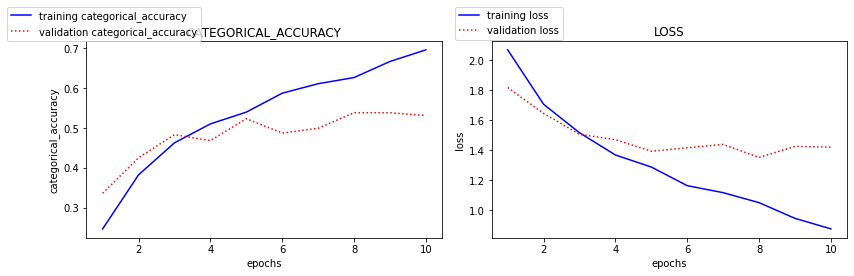

In [ ]:
# 시각화 

import matplotlib.pyplot as plt

def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

plot_history(hist)

32/32 [==============================] - 0s 10ms/step - loss: 1.3558 - categorical_accuracy: 0.5290
최종 성능 [1.355804443359375, 0.5289999842643738]


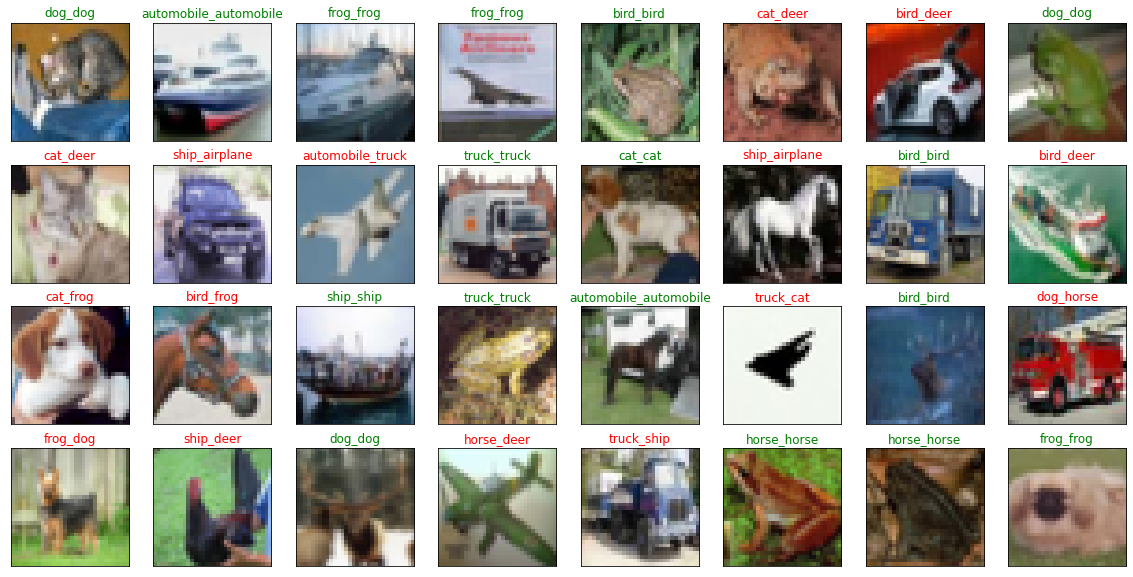

In [ ]:
# 최종 모델 평가 및 예측

score = model.evaluate(x_test, y_test)
print("최종 성능",score)

pred = model.predict(x_test)
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(20,10))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32)):
    ax = fig.add_subplot(4,8, i+1 , xticks=[], yticks=[])
    ax.imshow(x_test[i])
    
    pred_idx = np.argmax(pred[idx])
    true_idx = np.argmax(y_test[idx])
    
    ax.set_title("{}_{}".format(label[pred_idx], label[true_idx]), color='green' if pred_idx == true_idx else 'red')

## __3. using callbacks__

In [ ]:
# 학습 과정 중 사전 정의된 콜백 함수에 의해 여러 제어가 가능함.

# ReduceLROnPlateau : Adaptive Learning-rate 
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)

# EarlyStopping : stop when no imporvement continues
es = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, verbose=1)

# ModelCheckpoint : save model & weights every freq pre-defined
mc = ModelCheckpoint(filepath="weights/{epoch:02d}-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_freq="epoch")

my_callbacks=[rl,es,mc]

model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy()],
)

model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    callbacks=my_callbacks,
    validation_data=(x_val,y_val)
)

Epoch 1/50
63/63 [==============================] - 5s 69ms/step - loss: 0.8452 - categorical_accuracy: 0.6994 - val_loss: 1.3216 - val_categorical_accuracy: 0.5620

Epoch 00001: saving model to weights/01-1.32.h5
Epoch 2/50
63/63 [==============================] - 4s 65ms/step - loss: 0.7259 - categorical_accuracy: 0.7540 - val_loss: 1.3936 - val_categorical_accuracy: 0.5520

Epoch 00002: saving model to weights/02-1.39.h5
Epoch 3/50
63/63 [==============================] - 4s 66ms/step - loss: 0.6742 - categorical_accuracy: 0.7801 - val_loss: 1.3851 - val_categorical_accuracy: 0.5530

Epoch 00003: saving model to weights/03-1.39.h5
Epoch 4/50
63/63 [==============================] - 4s 66ms/step - loss: 0.5876 - categorical_accuracy: 0.8120 - val_loss: 1.4039 - val_categorical_accuracy: 0.5460

Epoch 00004: saving model to weights/04-1.40.h5
Epoch 5/50
63/63 [==============================] - 4s 65ms/step - loss: 0.5664 - categorical_accuracy: 0.8177 - val_loss: 1.4071 - val_categori

### __`Practice3. 위 학습과정에서 저장된 모델들 중 val_loss 가 가장 작은 모델을 불러와 evaluate 를 진행해보자.`__  

```python
from keras.models import load_model

model = load_model("path to .h5")

score = model.evaluate(x_test,y_test)

print("Best 모델 성능:",score)
```

In [ ]:
# Answer3.

# __4. 참고 링크들__  
- [도큐먼트 짱](https://keras.io/api)  
- [https://wikidocs.net/106897](https://wikidocs.net/106897) (3-API)  
- [https://jjeongil.tistory.com/953](https://jjeongil.tistory.com/953) (evaluate)  
- [https://data-newbie.tistory.com/644](https://data-newbie.tistory.com/644) (performance visualization)  